In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture 

dist_covid_index = pd.read_csv('S:/Hackathons/EY/results/dist_covid_index.csv')
X = dist_covid_index[['covid_index','dist_index']]
X = X.values


In [2]:

gm_bic= []
gm_score=[]
for i in range(1,8):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X)
    gm_bic.append(-gm.bic(X))
    gm_score.append(gm.score(X))

score_sheet = pd.DataFrame()
score_sheet['bic'] = gm_bic
score_sheet['clusters'] = list(range(1,8))
score_sheet

,bic,clusters
0,3965.475910,1
1,6377.343501,2
2,6684.900243,3
3,6932.000837,4
4,6992.052524,5
5,6987.578631,6
6,6985.791304,7


### From Above 5 is optimal Clusters

In [3]:
gm = GaussianMixture(n_components=5,n_init=10,tol=1e-3,max_iter=1000).fit(X)
print("n_components=5,n_init=10,tol=1e-3,max_iter=1000 :" , '{}'.format(-gm.bic(X) ))

n_components=5,n_init=10,tol=1e-3,max_iter=1000 : 6992.0525243837


In [4]:
gm = GaussianMixture(n_components=5,n_init=10,tol=1e-3,max_iter=1000,init_params = 'random').fit(X)
print("n_components=5,n_init=10,tol=1e-3,max_iter=1000,,init_params = 'random':" , '{}'.format(-gm.bic(X) ) )

n_components=5,n_init=10,tol=1e-3,max_iter=1000,,init_params = 'random': 7005.457101611181


In [5]:
gm = GaussianMixture(n_components=5,n_init=15,tol=1e-3,max_iter=1000,init_params = 'random').fit(X)
print("n_components=5,n_init=15,tol=1e-3,max_iter=1000:" , '{}'.format(-gm.bic(X) ) )

n_components=5,n_init=15,tol=1e-3,max_iter=1000: 7008.156961129004


In [6]:

gm = GaussianMixture(n_components=5,n_init=15,tol=1e-3,max_iter=1000,init_params = 'random').fit(X)
print("n_components=5,n_init=15,tol=1e-3,max_iter=1000:" , '{}'.format(-gm.bic(X) ) )

n_components=5,n_init=15,tol=1e-3,max_iter=1000: 7007.145538852722


BIC for covariance_type full: -6992.000431743378


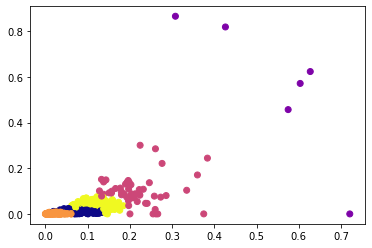

BIC for covariance_type tied: -5613.8843260458425


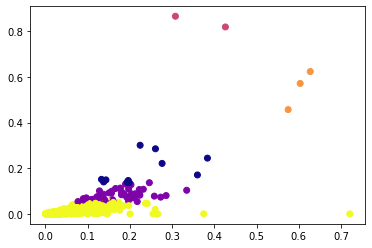

BIC for covariance_type diag: -6966.724615105848


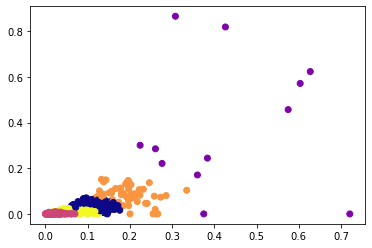

BIC for covariance_type spherical: -6369.307331530291


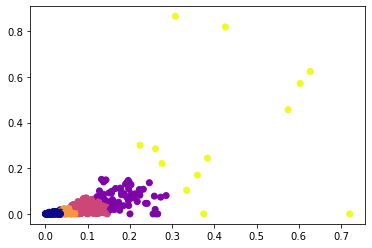

In [7]:
gm_bic= []
covariance_type = ['full', 'tied', 'diag', 'spherical']
for i in covariance_type:
    gm = GaussianMixture(n_components=5,n_init=10,tol=1e-3,max_iter=1000,covariance_type = i).fit(X)
    gm_bic.append(-gm.bic(X))
    print("BIC for covariance_type {}: {}".format(i,gm.bic(X)))
    
    gm_bic.append(-gm.bic(X))
    plt.scatter(X[:,1],X[:,0],c=list( gm.predict(X)),cmap='plasma')
    plt.show()

In [8]:
gmm = GaussianMixture(n_components=5,n_init=10,tol=1e-3,covariance_type = 'diag',max_iter=1000,init_params = 'random').fit(X)

C:\Users\dines\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

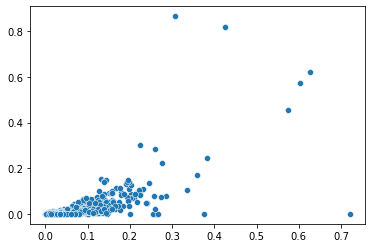

In [9]:
import seaborn as sns
sns.color_palette("tab10")
sns.scatterplot(X[:,1],X[:,0], markers=list( gm.predict(X)))

In [10]:

dist_covid_index['cluster'] = list(gmm.predict(X))

dist_covid_index.to_csv('S:/Hackathons/EY/results/dist_covid_index.csv',index = False)

### covariance type of diag yeilding better bic score